## ML Project #1
Exploratory Data Analysis & Preprocessing

In [1]:
# Import packages
import pandas as pd
import datetime
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read and show dataframe
df = pd.read_excel(r'../ml_project1_data.xlsx')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines    ...     NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635    ...                     7             0   
1  2014-03-08       38        11    ...                     5             0   
2  2013-08-21       26       426    ...                     4             0   
3  2014-02-10       26        11    ...                     6             0   
4  2014-01-19       94       173    ...                     5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [261]:
# First observations
print(df.columns)
print(df.shape)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
(2240, 29)


In [262]:
# Summary statistics
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts     ...       NumWebVisitsMonth  AcceptedCmp3  \
count      2240.000000     ...             2240.000000   2240.000000   
mean         37.525446     ...                5.316518      0.072768   
std          54.628979     ...                2.426645      0.259813   
min           0.000000     ...                0.000000      0.000000   
25%           3.000000     ...                3.000000      0.000000   
50%          12.000000     ...                6.000000      0.000000   
75%          50.000000     ...                7.000000      0.000000   
max         259.000000     ...               20.000000      1.000000   

       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  \
count   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000   
mean       0.074554      0.072768      0.064286      0.013393     0.009375   
std        0.262728      0.259813      0.245316      0.114976     0.096391   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     0.000000   
50%        0.000000      0.000000      0.000000      0.000000     0.000000   
75%        0.000000      0.000000      0.000000      0.000000     0.000000   
max        1.000000      1.000000      1.000000      1.000000     1.000000   

       Z_CostContact  Z_Revenue     Response  
count         2240.0     2240.0  2240.000000  
mean             3.0       11.0     0.149107  
std              0.0        0.0     0.356274  
min              3.0       11.0     0.000000  
25%              3.0       11.0     0.000000  
50%              3.0       11.0     0.000000  
75%              3.0       11.0     0.000000  
max              3.0       11.0     1.000000  

[8 rows x 26 columns]

In [321]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [263]:
# Summary szatistics for cat data
df.describe(include=["object", "category"])

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

Missing values

In [264]:
# Missing value detection function
def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    return pd.DataFrame({"N missings": ser, "p missings": ser.divide(df.shape[0])})

rm_df_miss = missing_values_reporter(df)
rm_df_miss

N missings  p missings
Income          24    0.010714

In [265]:
# Fill with average per feature
df_clean = df.fillna(df.mean())

Discriminability analysis

In [266]:
# Function
def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

In [267]:
# Influence of cat on target
list_cfeatures = ['Marital_Status','Education']

df_cat = describe_cat(df, list_cfeatures, "Response")
df_cat

Response          
                             count      mean
Marital_Status Absurd            2  0.500000
               Alone             3  0.333333
               Divorced        232  0.206897
               Married         864  0.113426
               Single          480  0.220833
               Together        580  0.103448
               Widow            77  0.246753
               YOLO              2  0.500000
Education      2n Cycle        203  0.108374
               Basic            54  0.037037
               Graduation     1127  0.134871
               Master          370  0.154054
               PhD             486  0.207819

In [268]:
# Discrimination plot 
def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        ax = df_cat.plot.bar(color="gray", title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)), legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)      
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2)
        plt.show()

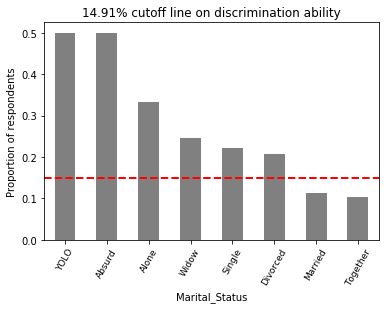

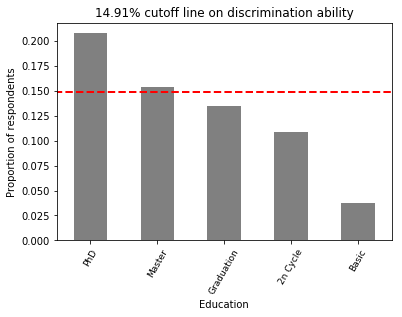

In [269]:
# Plot for all cat variables
categorical_discrimination_plot(df, ['Marital_Status','Education'], "Response")

In [270]:
# Replace categorical variables and combine
df_clean = df_clean.replace(to_replace={'Single':1,'Together':2,'Alone':1,'Married':3,'Divorced':4,'Widow':5,'Absurd':6,'YOLO':6})
df_clean = df_clean.replace(to_replace={'Basic':1,'Graduation':2,'2n Cycle':3,'Master':4,'PhD':5})

In [271]:
# Calculate membership days
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer']).dt.date
df_clean['days_cst'] = (pd.datetime.now().date()- df_clean['Dt_Customer']).dt.days
df_clean.drop(columns='Dt_Customer',inplace=True)

In [272]:
# Calculate age
df_clean['Age'] = 2018 - df_clean['Year_Birth']
df_clean.drop(columns='Year_Birth',inplace=True)

In [273]:
# Check final datatypes
df_clean.dtypes

ID                       int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
days_cst                 int64
Age                      int64
dtype: object

Outliers

In [315]:
# IQR method
# Calculating the interquartile ranges for each column
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Removing all rows where a value is not within 1.5 IQR from Q1 or Q3
df_IQR = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) |(df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
(df_IQR.shape[0] -df_clean.shape[0]) /df_clean.shape[0]

# Less strict: Removing all rows where a value is not within 2 IQR from Q1 or Q3
#df_IQR = df[~((df < (Q1 - 2* IQR)) |(df > (Q3 + 2 * IQR))).any(axis=1)]
print('Removing outliers using the IQR method with 1.5 quartiles would lead to the removal of: ',abs(df_IQR.shape[0] -df_clean.shape[0]),'von',df_clean.shape[0])

Removing outliers using the IQR method with 1.5 quartiles would lead to the removal of:  948 von 2099


In [314]:
# Zscore
z = np.abs(stats.zscore(df_clean))
threshold = 3
df_zscore = df_clean[(z < 3).all(axis=1)]
print('Removing outliers using the ZScore method with threshold 3 would lead to the removal of: ',abs(df_zscore.shape[0] -df_clean.shape[0]),'von',df_clean.shape[0])

Removing outliers using the ZScore method with threshold 3 would lead to the removal of:  583 von 2099


Distribution based

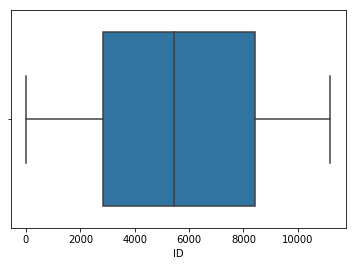

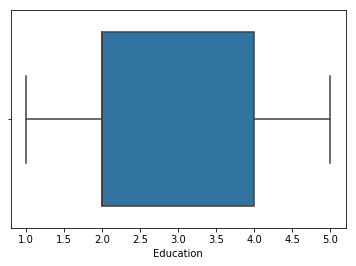

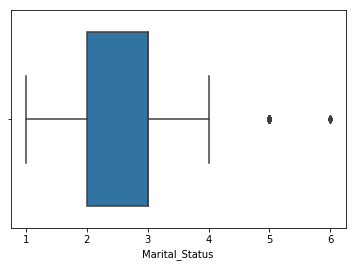

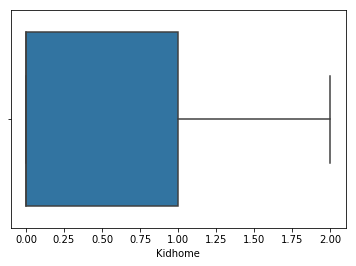

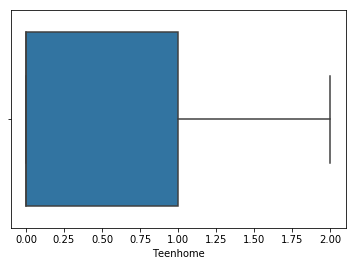

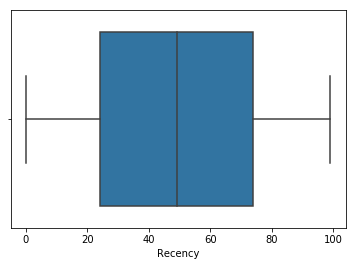

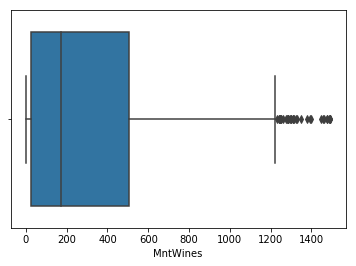

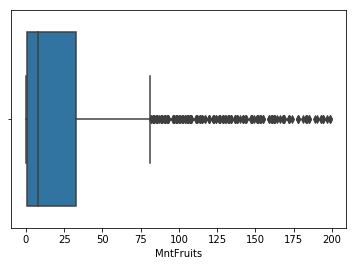

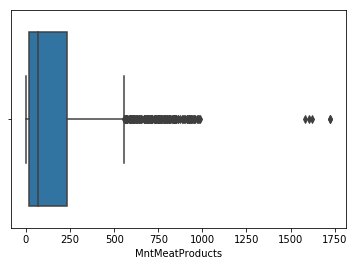

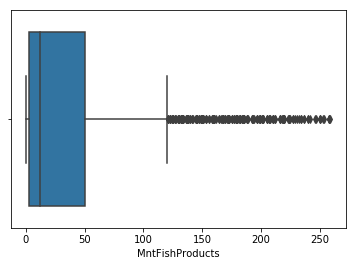

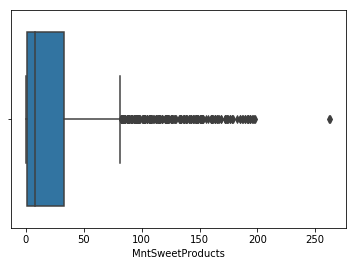

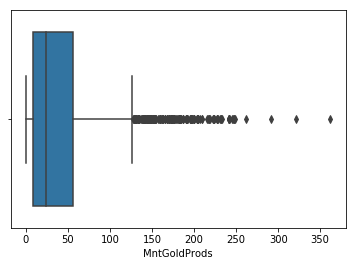

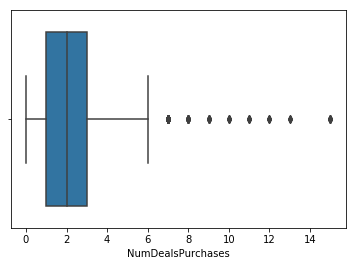

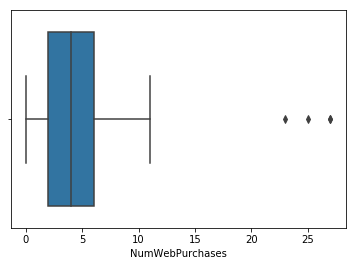

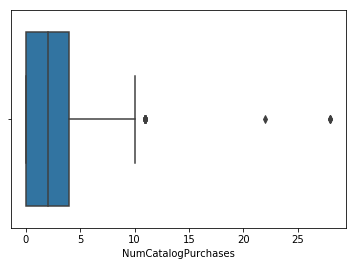

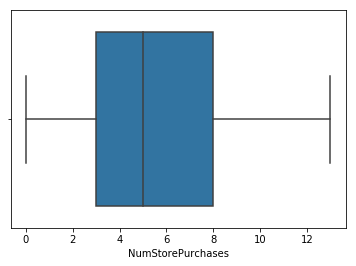

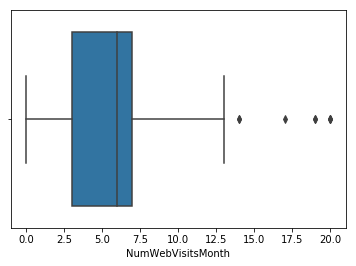

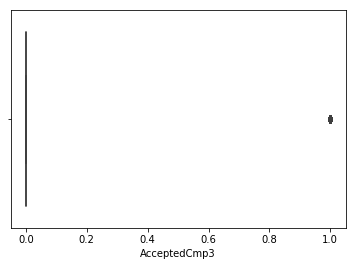

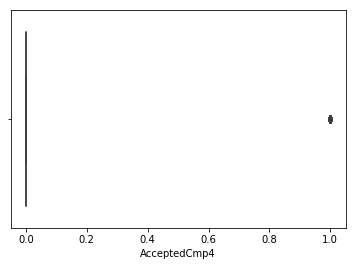

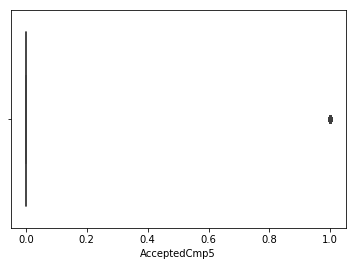

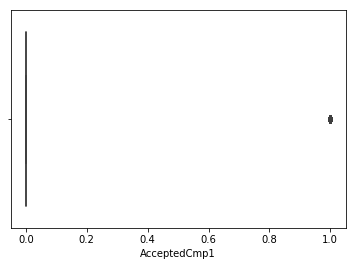

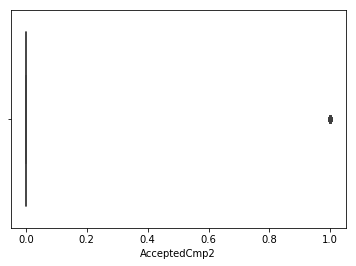

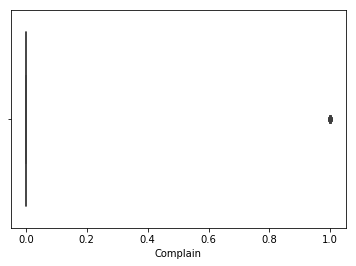

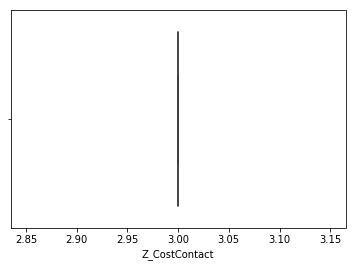

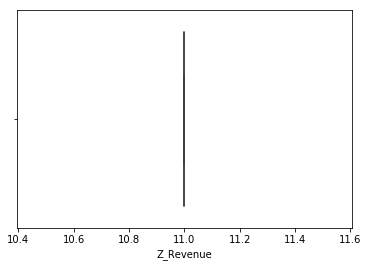

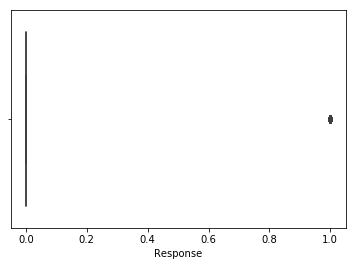

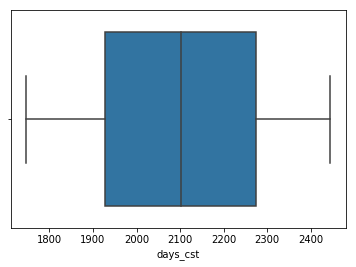

<Figure size 432x288 with 0 Axes>

In [295]:
# Plot distributions
for i in df_clean.columns:
    sns.boxplot(x=df_clean[i])
    plt.show()
    plt.clf()

In [296]:
# Remove visual outliers
df_clean= df_clean.loc[df['Income'] <150000]
df_clean = df_clean.loc[df_clean['MntMeatProducts']< 1250]
df_clean = df_clean.loc[df_clean['MntSweetProducts']< 225]
df_clean = df_clean.loc[df_clean['MntGoldProds']<250]
df_clean = df_clean.loc[df_clean['NumDealsPurchases']<7]
df_clean = df_clean.loc[df_clean['NumWebPurchases']<20]
df_clean = df_clean.loc[df_clean['NumCatalogPurchases']<=10]
df_clean = df_clean.loc[df_clean['NumWebVisitsMonth']<=14]
df_clean = df_clean.loc[df_clean['Age']<=100]

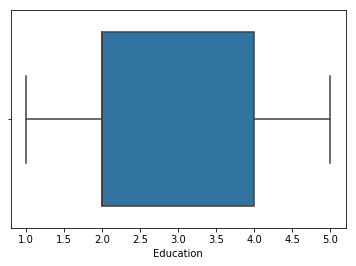

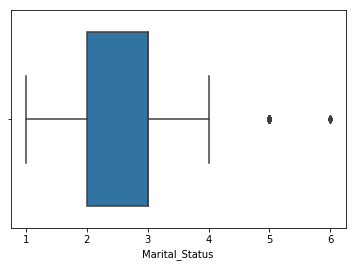

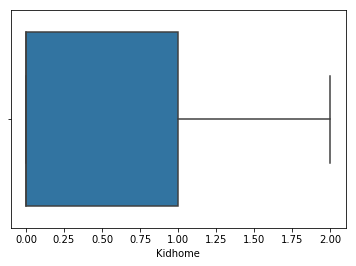

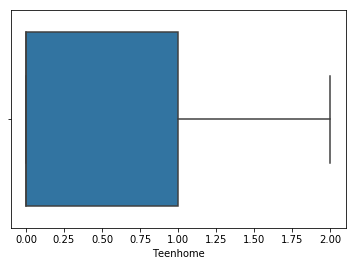

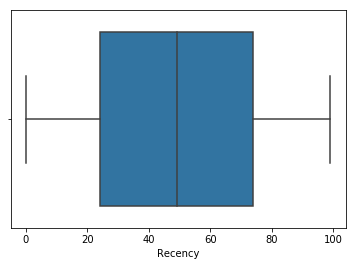

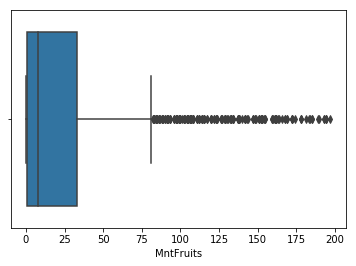

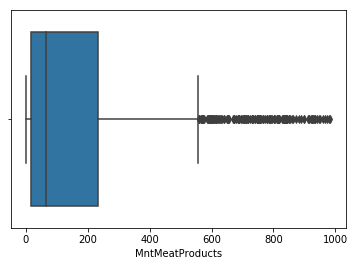

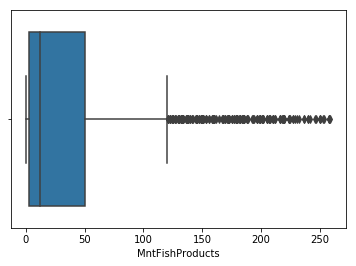

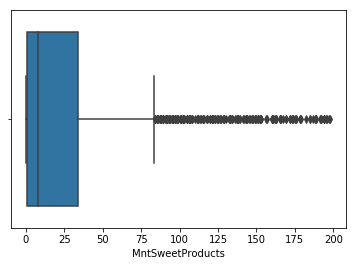

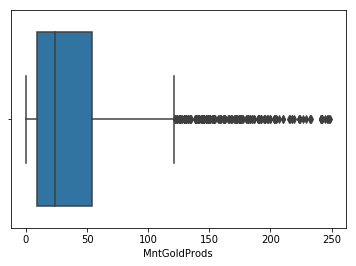

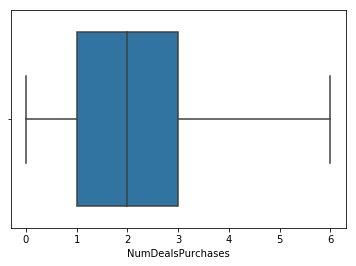

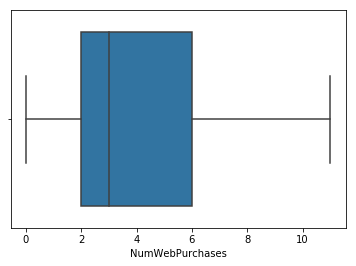

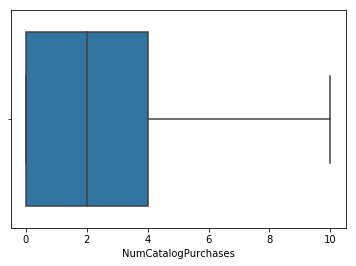

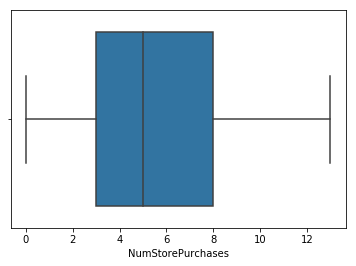

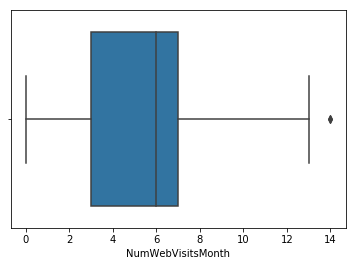

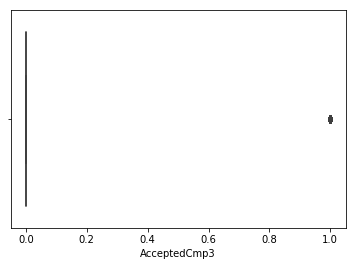

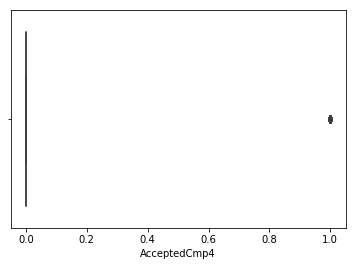

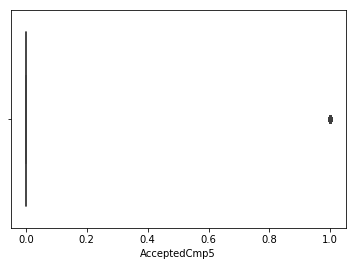

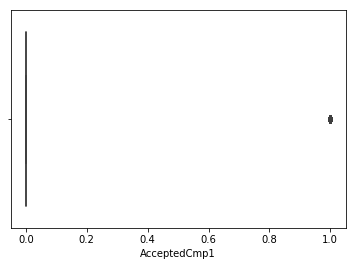

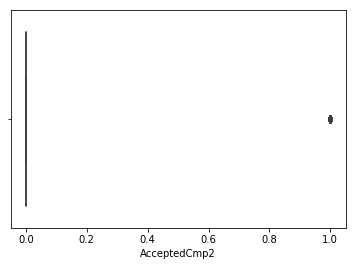

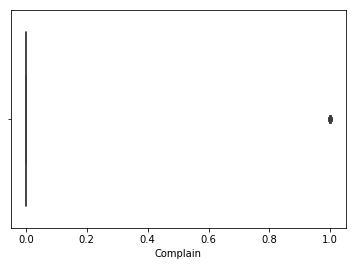

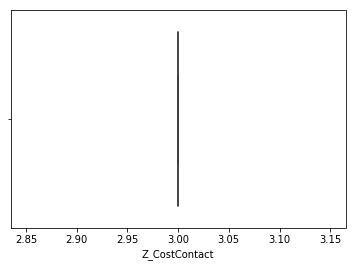

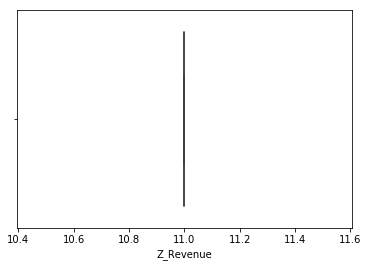

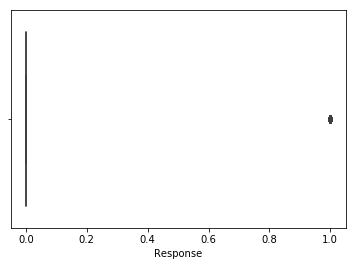

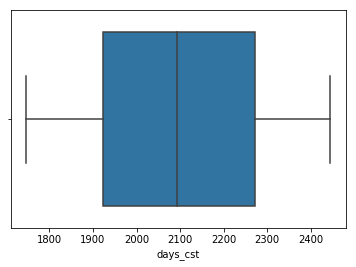

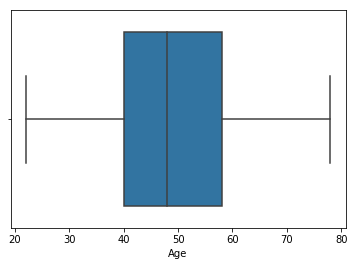

<Figure size 432x288 with 0 Axes>

In [297]:
# Check boxplots after outlier-removal
for i in df_clean.columns:
    sns.boxplot(x=df_clean[i])
    plt.show()
    plt.clf()

In [298]:
# How many outliers were removed?
print('Outlier removal of: ',df.shape[0]-df_clean.shape[0],'of ',df.shape[0])

Outlier removal of:  141 of  2240


Remove constants

In [301]:
# Describe numerical values with quantiles
describe_num = df_clean.describe(percentiles=np.arange(0.2, .8, .2))
display(describe_num)
const = describe_num.columns[describe_num.loc["std"]<0.01]
print("Columns with zero or almost zero variance to be removed:", 
      list(const))

# remove constants
df_clean.drop(labels=const, axis=1, inplace=True) 

ID    Education  Marital_Status         Income      Kidhome  \
count   2099.000000  2099.000000     2099.000000    2099.000000  2099.000000   
mean    5615.724154     3.040972        2.494521   51446.967604     0.430205   
std     3256.354554     1.277598        1.058959   20690.195151     0.532332   
min        0.000000     1.000000        1.000000    3502.000000     0.000000   
20%     2293.800000     2.000000        1.000000   31611.000000     0.000000   
40%     4442.400000     2.000000        2.000000   43854.000000     0.000000   
50%     5517.000000     2.000000        3.000000   50616.000000     0.000000   
60.0%   6641.000000     3.000000        3.000000   58201.200000     1.000000   
80%     9120.400000     5.000000        3.000000   71607.600000     1.000000   
max    11191.000000     5.000000        6.000000  105471.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2099.000000  2099.000000  2099.000000  2099.000000      2099.000000   
mean      0.490710    48.967604   300.367794    26.303001       163.195808   
std       0.540349    29.000294   338.563053    39.461794       215.651500   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
20%       0.000000    19.000000    15.000000     1.000000        11.000000   
40%       0.000000    39.000000    73.000000     4.000000        32.200000   
50%       0.000000    49.000000   166.000000     8.000000        64.000000   
60.0%     1.000000    58.000000   275.000000    15.000000       107.000000   
80%       1.000000    79.000000   576.000000    44.000000       294.400000   
max       2.000000    99.000000  1493.000000   197.000000       984.000000   

          ...       AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count     ...        2099.000000   2099.000000   2099.000000   2099.000000   
mean      ...           0.073368      0.073368      0.063840      0.013816   
std       ...           0.260802      0.260802      0.244526      0.116755   
min       ...           0.000000      0.000000      0.000000      0.000000   
20%       ...           0.000000      0.000000      0.000000      0.000000   
40%       ...           0.000000      0.000000      0.000000      0.000000   
50%       ...           0.000000      0.000000      0.000000      0.000000   
60.0%     ...           0.000000      0.000000      0.000000      0.000000   
80%       ...           0.000000      0.000000      0.000000      0.000000   
max       ...           1.000000      1.000000      1.000000      1.000000   

          Complain  Z_CostContact  Z_Revenue     Response     days_cst  \
count  2099.000000         2099.0     2099.0  2099.000000  2099.000000   
mean      0.009052            3.0       11.0     0.146260  2096.489757   
std       0.094733            0.0        0.0     0.353451   201.939267   
min       0.000000            3.0       11.0     0.000000  1746.000000   
20%       0.000000            3.0       11.0     0.000000  1884.600000   
40%       0.000000            3.0       11.0     0.000000  2025.200000   
50%       0.000000            3.0       11.0     0.000000  2094.000000   
60.0%     0.000000            3.0       11.0     0.000000  2165.000000   
80%       0.000000            3.0       11.0     0.000000  2304.400000   
max       1.000000            3.0       11.0     1.000000  2445.000000   

               Age  
count  2099.000000  
mean     48.957122  
std      11.738129  
min      22.000000  
20%      39.000000  
40%      45.000000  
50%      48.000000  
60.0%    52.000000  
80%      61.000000  
max      78.000000  

[10 rows x 29 columns]

Columns with zero or almost zero variance to be removed: ['Z_CostContact', 'Z_Revenue']


In [302]:
print("Any column with negative values?:", 
      (df._get_numeric_data()<0).any().any())

Any column with negative values?: False


Discriminatability

In [306]:
# Categorical variables
list_cfeatures = ['Marital_Status','Education']

rm_df_cat = describe_cat(df_clean, list_cfeatures, "Response")
rm_df_cat

Response          
                    count      mean
Marital_Status 1      450  0.222222
               2      540  0.101852
               3      811  0.109741
               4      221  0.203620
               5       73  0.219178
               6        4  0.500000
Education      1       54  0.037037
               2     1056  0.129735
               3      192  0.114583
               4      344  0.151163
               5      453  0.207506

C:\Users\jojo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


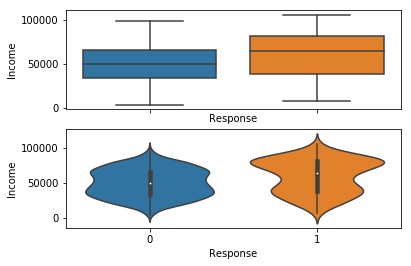

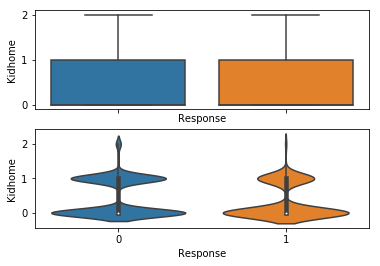

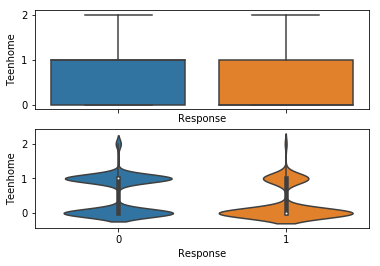

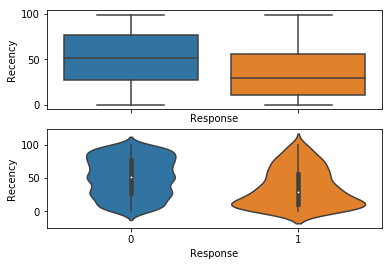

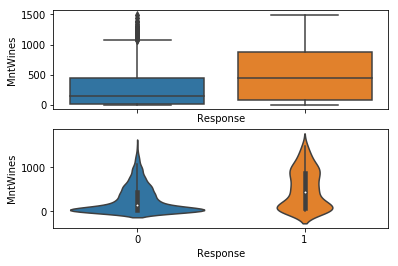

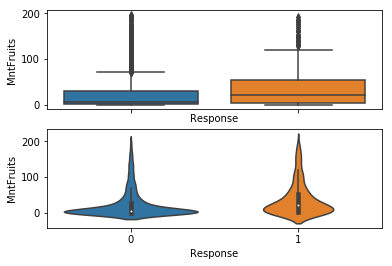

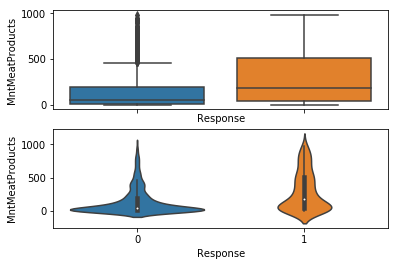

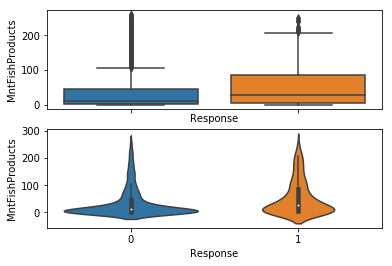

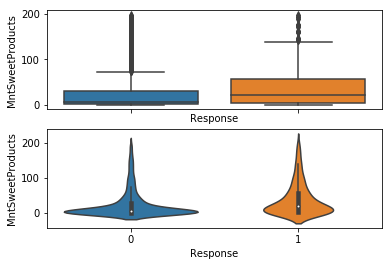

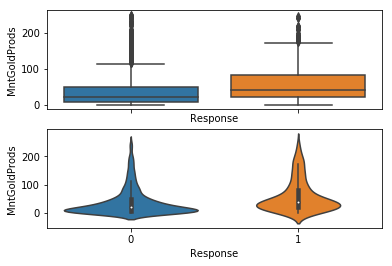

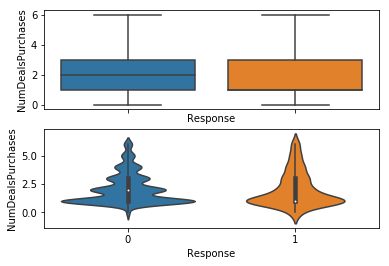

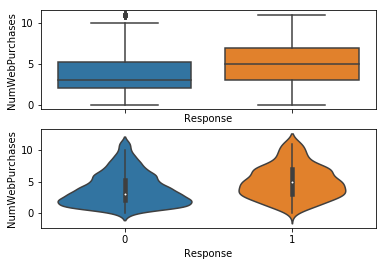

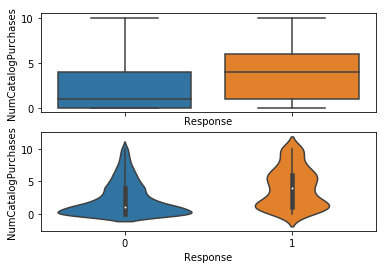

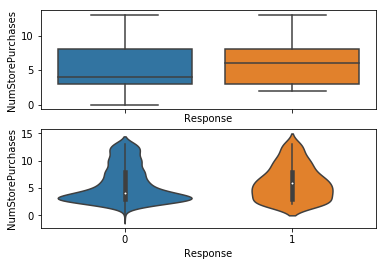

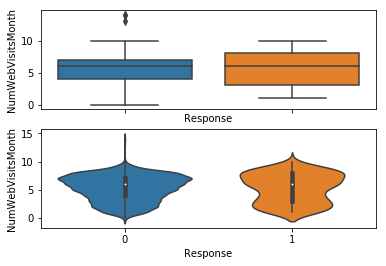

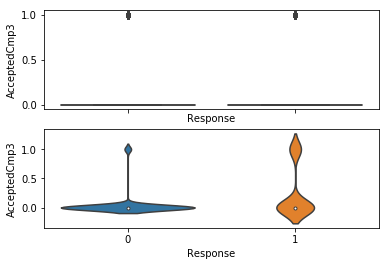

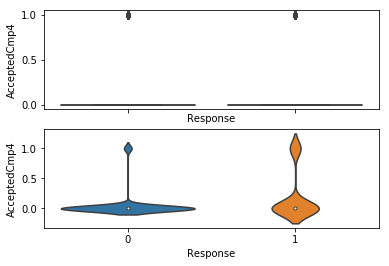

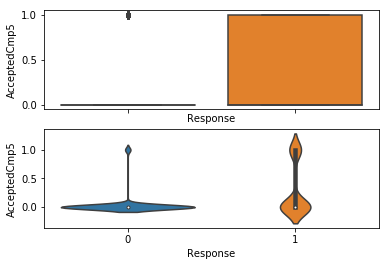

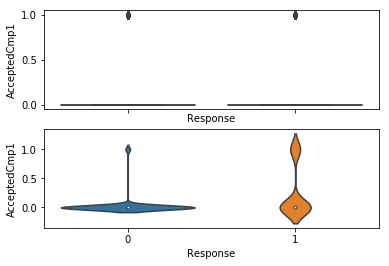

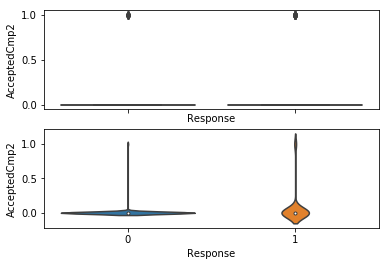

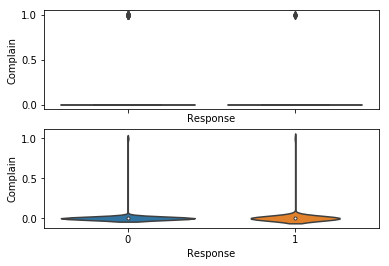

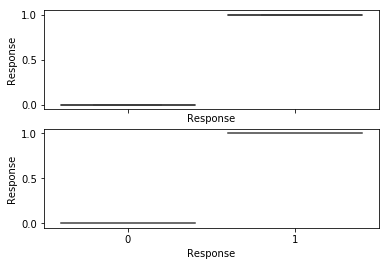

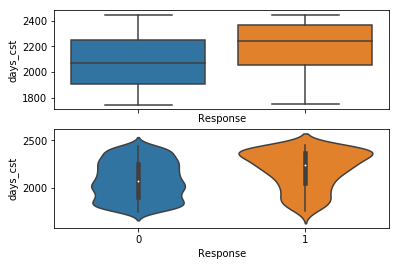

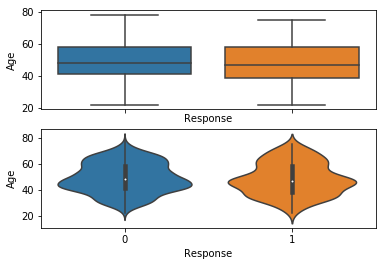

In [303]:
# Check distributions target <> cont features
for i in df_clean.columns:
    if i not in ['Marital_Status','Education','ID']:
        fig, ax = plt.subplots(2, 1, sharex=True)
        sns.boxplot(data = df_clean, y = i, x = target, ax=ax[0])
        sns.violinplot(data = df_clean, y = i, x = target, split = True, ax=ax[1])
        plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BC6FE5D68>,
      dtype=object)

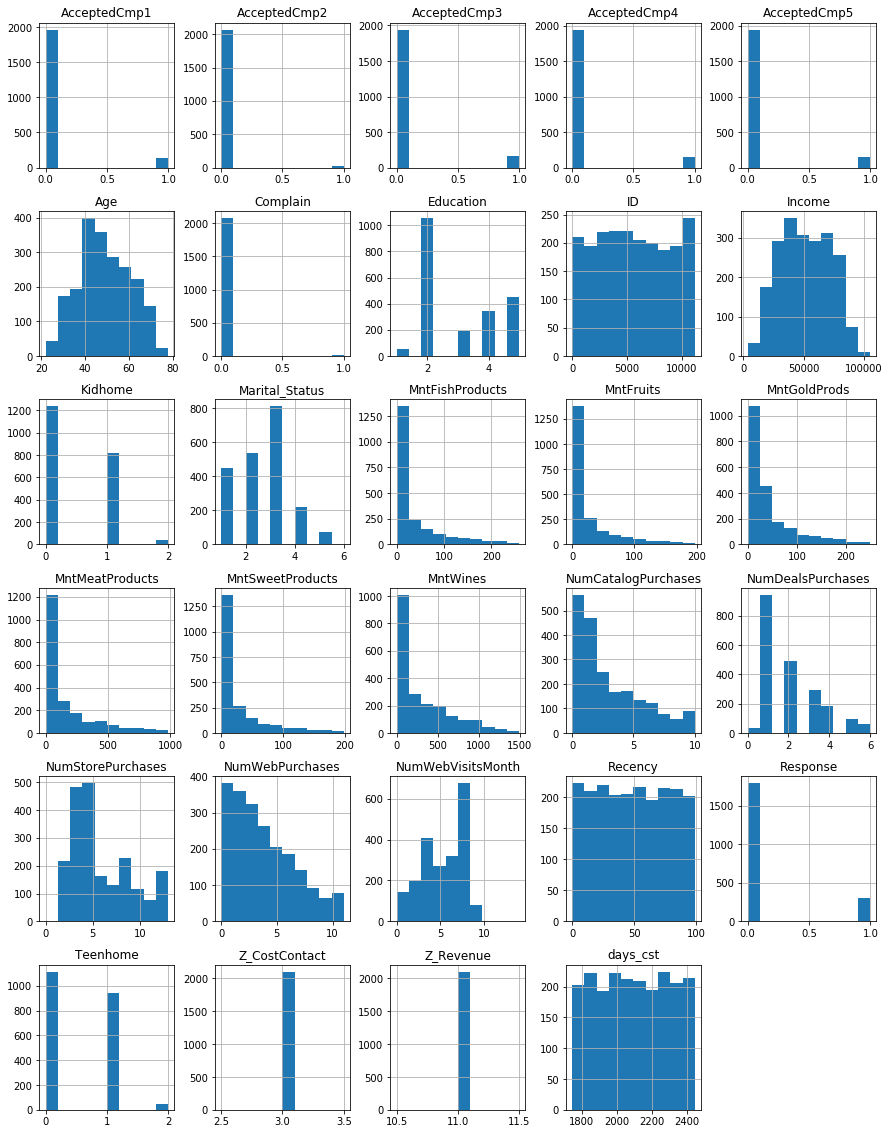

In [299]:
# Plot the histograms for all variables
pd.DataFrame.hist(df_clean,figsize = (15,20))

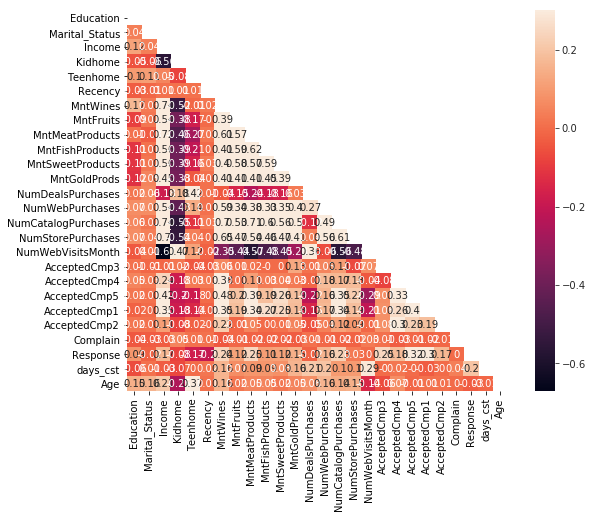

In [316]:
# Graph correlations
corr=df_clean.corr(method='pearson').round(2)
corr_iloc = corr.iloc[1:,1:]

mask = np.zeros_like(corr_iloc)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))
with sns.axes_style("white"):
    ax = sns.heatmap(corr_iloc, annot=True,mask=mask, vmax=.3, square=True)

C:\Users\jojo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jojo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jojo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\jojo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Us

C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\jojo\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users

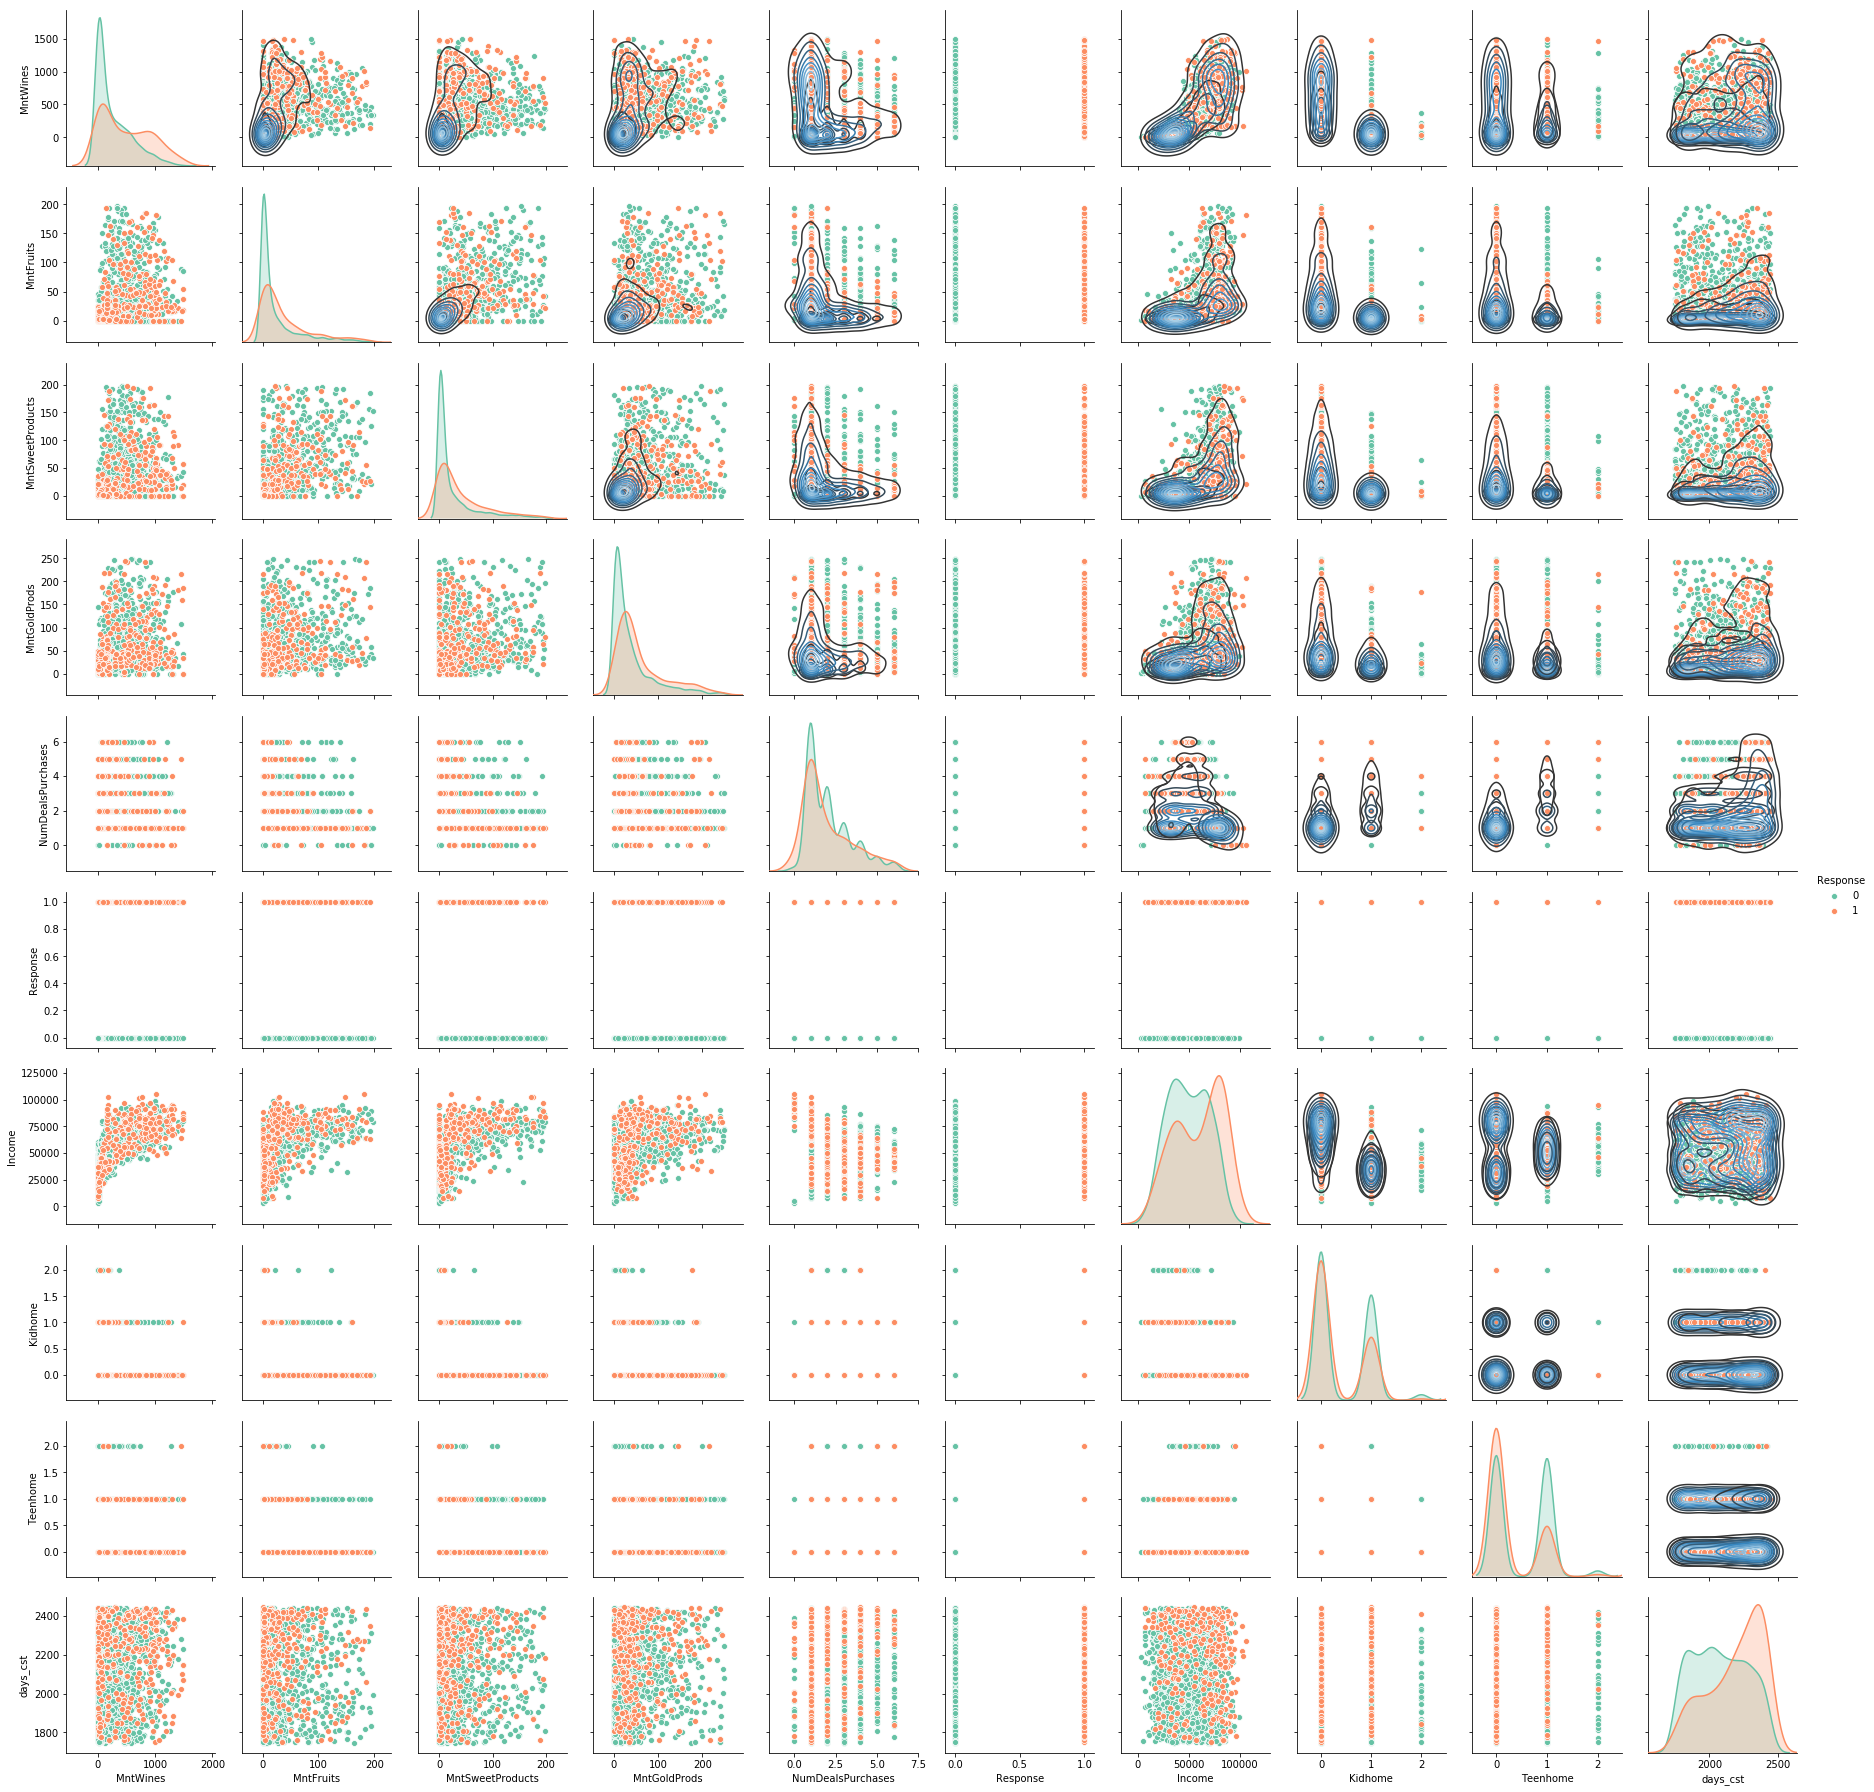

In [320]:
# KDE plot
df_clean['Response']=df_clean['Response'].astype('object')
feature_list = ["MntWines",'MntFruits','MntSweetProducts','MntGoldProds','NumDealsPurchases','Response','Income','Kidhome','Teenhome','days_cst','Age']

sns.pairplot(df_clean[feature_list],  hue='Response', palette="Set2",
             vars=feature_list[:-1],             
             diag_kind="kde").map_upper(sns.kdeplot, cmap="Blues_d")
plt.show()

# Feature importance

seed  test_accuracy  test_precision_macro  test_recall_macro  \
0     0       0.828234              0.672512           0.669406   
1     0       0.860685              0.737534           0.680796   
2     0       0.866092              0.751627           0.682434   
3     0       0.878692              0.782040           0.714984   
4     0       0.888313              0.805450           0.731647   

   test_f1_weighted  test_roc_auc  normalized_profit  n_features  
0          0.826876      0.827900           0.295495           1  
1          0.851343      0.845915           0.377778           2  
2          0.855294      0.856532           0.390991           3  
3          0.870616      0.879377           0.476877           4  
4          0.880407      0.881100           0.526727           5

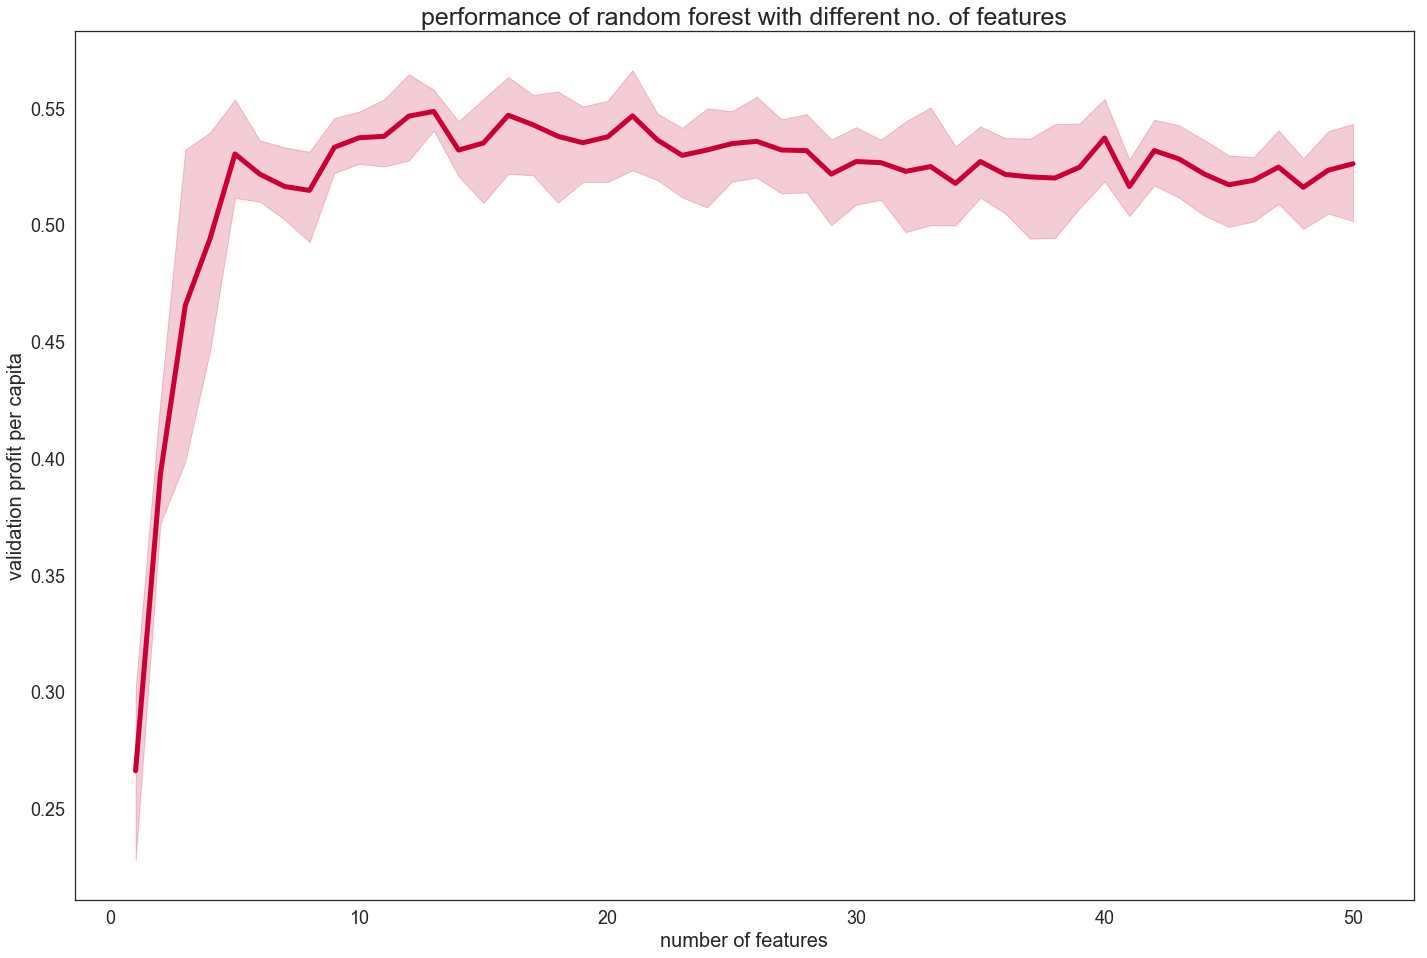

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
sns.set_style("white")

beta=pd.read_excel(r'../n_features.xlsx')

display(beta.head())

ax = sns.lineplot(x="n_features", y="normalized_profit", data=beta, linewidth=5.0,color='#C90035')
ax.set_title('performance of random forest with different no. of features', fontsize=25)
ax.set_xlabel("number of features",fontsize=20)
ax.set_ylabel("validation profit per capita",fontsize=20)
ax.tick_params(labelsize=18)
fig = ax.get_figure()
fig.savefig("n_features.png") 




In [9]:
beta.groupby('n_features', as_index=False)['normalized_profit','test_f1_weighted'].mean().sort_values(['normalized_profit'] , ascending=False)

n_features  normalized_profit  test_f1_weighted
12          13           0.548561          0.885158
15          16           0.546896          0.885569
20          21           0.546654          0.885937
11          12           0.546522          0.884998
16          17           0.542809          0.884956
17          18           0.537888          0.883980
10          11           0.537877          0.883268
19          20           0.537648          0.884437
9           10           0.537282          0.882848
39          40           0.537175          0.886000
21          22           0.536328          0.884589
25          26           0.535733          0.884842
18          19           0.535133          0.884111
14          15           0.535003          0.883118
24          25           0.534760          0.884691
8            9           0.533201          0.881885
23          24           0.532016          0.884361
26          27           0.532011          0.883999
13          14           0.532003          0.882530
27          28           0.531772          0.884455
41          42           0.531768          0.885189
4            5           0.530335          0.880352
22          23           0.529728          0.883661
42          43           0.528168          0.884459
34          35           0.527086          0.884232
29          30           0.527085          0.883761
30          31           0.526603          0.883566
49          50           0.526131          0.883620
32          33           0.524929          0.883502
46          47           0.524690          0.883886
38          39           0.524677          0.883611
48          49           0.523366          0.883723
31          32           0.522885          0.883008
43          44           0.521809          0.883178
28          29           0.521685          0.882709
5            6           0.521681          0.880013
35          36           0.521563          0.882853
36          37           0.520486          0.882763
37          38           0.520019          0.882599
45          46           0.519042          0.882820
33          34           0.517723          0.882605
44          45           0.517120          0.882840
40          41           0.516400          0.882217
6            7           0.516382          0.879684
47          48           0.516038          0.882503
7            8           0.514722          0.879046
3            4           0.494167          0.872767
2            3           0.465471          0.866438
1            2           0.393147          0.853251
0            1           0.266194          0.821346

In [10]:
lst=[['Dt_Customer' ,'Income', 'LD1', 'MntMeatProducts', 'PC2' ,'PC3' ,'Recency', 'Web_conversion' ,'avg_no_store_per_month', 'ever_accep', 'mnt_total' ,'response_rate', 'total_response '],['Dt_Customer' ,'Income', 'Kmode' ,'LD1', 'MntMeatProducts' ,'PC3' ,'Recency' ,'avg_no_cat_per_month' ,'avg_no_store_per_month' ,'ever_accep' ,'mnt_total' ,'response_rate' ,'total_response '],['Dt_Customer' ,'Income' ,'LD1' ,'MntMeatProducts' ,'PC1' ,'PC2' ,'PC3', 'Recency' ,'avg_no_store_per_month' ,'ever_accep' ,'mnt_total' ,'response_rate' ,'total_response '],['Dt_Customer', 'Income' ,'LD1' ,'MntMeatProducts' ,'PC2' ,'PC3' ,'PC6' ,'Recency' ,'avg_no_store_per_month' ,'ever_accep' ,'mnt_total' ,'response_rate' ,'total_response '],['Dt_Customer', 'Income' ,'LD1', 'MntMeatProducts' ,'PC2', 'PC3' ,'PC6' ,'Recency' ,'avg_no_store_per_month' ,'ever_accep' ,'mnt_total' ,'response_rate' ,'total_response '] ]

In [11]:
flat_list = [item for sublist in lst for item in sublist]
myset = set(flat_list)
len(myset)

17

In [12]:
myset

{'Dt_Customer',
 'Income',
 'Kmode',
 'LD1',
 'MntMeatProducts',
 'PC1',
 'PC2',
 'PC3',
 'PC6',
 'Recency',
 'Web_conversion',
 'avg_no_cat_per_month',
 'avg_no_store_per_month',
 'ever_accep',
 'mnt_total',
 'response_rate',
 'total_response '}

# Characteristics of customers

In [14]:
data=pd.read_excel(r'../data.xlsx')
display(data.head())

Dt_Customer   Income       LD1  MntMeatProducts       PC2       PC3  \
0       1829.0  46344.0 -0.529445              6.0 -0.374377  0.000151   
1       2028.0  71613.0 -0.840526            127.0 -0.123463 -0.226752   
2       1855.0  26646.0 -0.720271             20.0 -0.301736 -0.165648   
3       1877.0  58293.0 -1.250373            118.0 -0.035839  0.470788   
4       2009.0  62513.0  0.025848             98.0 -0.115134 -0.316719   

        PC6  Recency  avg_no_store_per_month  ever_accep  mnt_total  \
0  0.076937     38.0                0.032805         0.0       21.0   
1  0.026033     26.0                0.147929         0.0      734.0   
2 -0.025893     26.0                0.064690         0.0       48.0   
3  0.112811     94.0                0.095898         0.0      407.0   
4 -0.185424     16.0                0.149328         0.0      702.0   

   response_rate  total_response  Label  
0            0.0             0.0      0  
1            0.0             0.0      0  
2            0.0             0.0      0  
3            0.0             0.0      0  
4            0.0             0.0      0

### Special variables:
The Variables LD1 and PC\* are results of linear transformations on the features “Num\*Purchases”, “Year_birth”, “Income”, “Recency” “DT_Customer” and “Mnt\*” unfortunatly a interpretation is not steight forwards and needs more indepth analysis

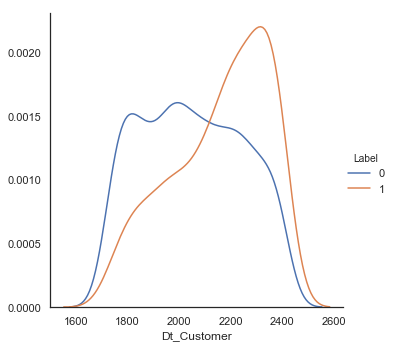

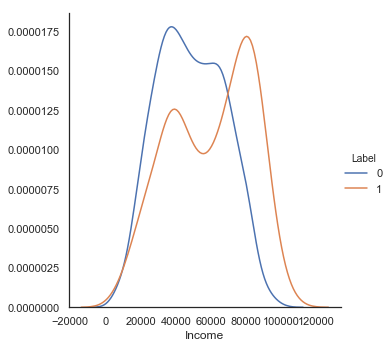

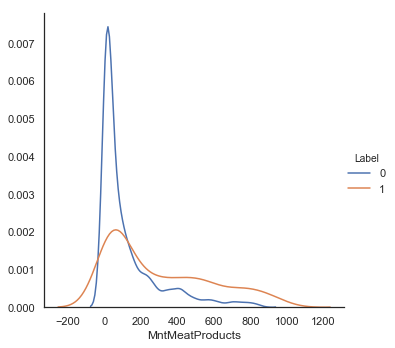

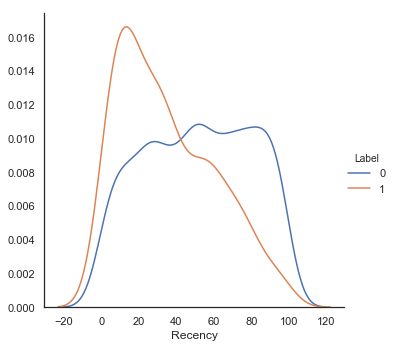

In [15]:
data_ = data[['Dt_Customer','Income','MntMeatProducts','Recency','Label']]
for i in data_.columns.values[:-1]:
        import warnings
        warnings.filterwarnings("ignore")
        sns.FacetGrid(data, hue="Label", size=5).map(sns.kdeplot, i).add_legend()
        plt.show()

## Interpretations:

customers are more likely to accept the campaign who:

1. are long customers

2. have a higher income

3. spend more on Meat products

4. have not purchased items recently

5. spend more than the average customer in the last two years

In [16]:
data.groupby('Label', as_index=False)['ever_accep'].mean().sort_values(['ever_accep'] , ascending=False)

Label  ever_accep
1      1    0.556415
0      0    0.137322

Moreover, customers are more likely to accept if they have ever accepted a previous campain.

In [17]:
feature, target = "total_response", "Label"
data.groupby('Label', as_index=False)['total_response'].mean().sort_values(['total_response'] , ascending=False)

Label  total_response
1      1        0.977207
0      0        0.166952

Considering the total responses to previous campaings, the customers who accepted the test campaign have on average aceppted also one previous campaign.

# Multivariate outlier detection (not applied)

In [18]:
data = pd.read_csv('../data.csv')
data = data.drop(data.columns[0], axis=1)

In [19]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from scipy.linalg import inv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pddf = pd.DataFrame
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [20]:
def mahalanobis_r_pd(X,mean,S_inv):
    data = []
    for i in range(X.shape[0]):
        data.append(mahalanobis(X.iloc[i,:],mean,S_inv) ** 2)
    ser_ = pd.Series(data, X.index.values)
    return(ser_)

def qqplot(data):
    import scipy as sp
    '''takes continuous data as np.array and returns qq plot https://en.wikipedia.org/wiki/Q–Q_plot'''

    df = data
    n = df.shape[0]
    p = df.shape[1]
    
    S = np.cov(df.T)
    S_inv = inv(S)

    mean = df.mean(axis=0)


    d_squared = mahalanobis_r_pd(df,mean,S_inv)

    d_squared =d_squared.sort_values()
    quantiles = np.linspace(0.5,n-0.5,n)/n

    x = chi2.ppf(quantiles, p)
    plt.scatter(d_squared, x)
    plt.title('QQ plot for Multivariable normality')
    plt.xlabel('Squared Mahalanobis distances')
    plt.ylabel('Chi-squared quantiles')
    plt.plot(x, x, color='r')

def stal_plot(df, disp = False):
    '''The stalactite plot for the detection of multivariate outliers. Atkinson, A.C. & Mulira, HM. Stat Comput (1993) 3: 27. https://doi.org/10.1007/BF00146951'''
    import pandas as pd
    
    import numpy as nd
    import time
    import progressbar

    
    #needs index initialization
    n = df.shape[0]
    p = df.shape[1]
    i = np.asarray(range(0,n))
    
    
    pd.set_option('display.max_rows', n-p)
    pd.set_option('display.max_columns', n)
    
    
    
    thresh = chi2.ppf((n-0.5)/n, p)
    
    
    ind = np.zeros((n-p, n))
    ind_1 = 0
    
    sample = np.random.choice(i, p+1,replace=False) # first randomly samle n+1 for the first sample mean

    with progressbar.ProgressBar(max_value=n-p) as bar:
   
        
        x_mean = df.iloc[sample].mean()
        S = df.iloc[sample].cov()
        #print(S.shape)
        S_inv = inv(S)
        M = mahalanobis_r_pd(df, x_mean, S_inv)
        ind_2 = i[M > thresh]   
        ind[ind_1, ind_2] = 1
        bar.update(ind_1)

        for e in (range(p+2,n+1)):
            #print(e) 
            ind_1 +=1
            #print(ind_1)
            x_mean = df.loc[M.nlargest(e).index.values].mean()
            S = df.loc[M.nlargest(e).index.values].cov()
            #print(S.shape)
            S_inv = inv(S)
            M = mahalanobis_r_pd(df, x_mean, S_inv)
            ind_2 = i[M > thresh]   
            #print(ind_2)
            ind[ind_1, ind_2] = 1#??
            bar.update(ind_1)
    
        out_ind = ind_2
        plot = pd.DataFrame(ind)
        if disp == True:
            plot_ = plot.replace(0, ' ')
            plot_ = plot_.replace(1, '*')
            display(plot_)
    
    format_dictionary = {'outl': int(sum(plot.iloc[-1])), 'index': out_ind}
    if sum(plot.iloc[-1])==0:
        print('The stalactite plot found no strage observations')
    else:
        print('The stalactite plot found {outl} strage observations.\nIndexes{index} are suspicious. '.format(**format_dictionary))
    return out_ind
 

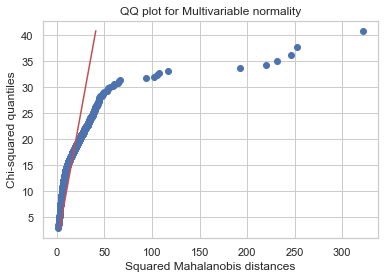

In [21]:
data=data.reset_index(inplace = False, drop =True)
qqplot(data)

In [ ]:
x = stal_plot(data,disp= False)

In [ ]:
x = x.tolist()
test = data.drop(index = x)
qqplot(test)

In [ ]:
print("Any column with negative values?:", 
      (test._get_numeric_data()<0).any().any())

In [ ]:
min_ = test.min(axis=0)
min_ = min_*(-1)+0.1
test_1 = test + min_

In [ ]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method='box-cox', standardize=True, copy=True)
PT.fit(test_1)
test_2 = pddf(PT.transform(test_1))

In [ ]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method='box-cox', standardize=True, copy=True)
PT.fit(test_1)
test_2 = pddf(PT.transform(test_1))

### The data is now follwing the tehoretical quantiles, however, this has to be done in a loop till no more outliers are found but it is not practical ..